In [4]:
import os
import torch
from ultralytics import YOLO

# Resolve OpenMP warning
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

def train_yolo_model():
    # Detect and set device
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Training on: {device}")

    # Data path
    data_path = r"/kaggle/input/persian-car-plates/Persian_Car_Plates_YOLOV8/data.yaml"
    
    # Validate data path
    if not os.path.exists(data_path):
        raise FileNotFoundError(f"Data YAML not found: {data_path}")

    # Initialize and train model
    model = YOLO('yolov8n.pt')
    results = model.train(
        data=data_path,
        epochs=50,
        imgsz=640,
        batch=16,
        conf=0.5,
        device=device
    )

    return results

if __name__ == '__main__':
    train_yolo_model()

Training on: cuda


100%|██████████| 6.25M/6.25M [00:00<00:00, 18.5MB/s]


Ultralytics 8.3.35 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/persian-car-plates/Persian_Car_Plates_YOLOV8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.5, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

100%|██████████| 755k/755k [00:00<00:00, 4.11MB/s]
2024-11-22 10:36:33,941	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-22 10:36:34,800	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 16.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/persian-car-plates/Persian_Car_Plates_YOLOV8/train/labels... 219 images, 0 backgrounds, 0 corrupt: 100%|██████████| 219/219 [00:00<00:00, 361.66it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/persian-car-plates/Persian_Car_Plates_YOLOV8/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/persian-car-plates/Persian_Car_Plates_YOLOV8/valid/labels... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 272.15it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/persian-car-plates/Persian_Car_Plates_YOLOV8/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.15G      1.383      3.453      1.387         20        640: 100%|██████████| 14/14 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         63         63          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.14G     0.8557      1.776     0.9359         25        640: 100%|██████████| 14/14 [00:02<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]

                   all         63         63          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.15G     0.8284      1.406     0.9499         22        640: 100%|██████████| 14/14 [00:02<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         63         63          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.15G     0.8612      1.306     0.9482         19        640: 100%|██████████| 14/14 [00:02<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         63         63          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.13G     0.8167      1.233     0.9367         28        640: 100%|██████████| 14/14 [00:02<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         63         63      0.947      0.286      0.611      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.15G      0.918      1.259      0.973         16        640: 100%|██████████| 14/14 [00:02<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         63         63       0.96      0.381      0.676      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.14G     0.9582      1.234     0.9607         25        640: 100%|██████████| 14/14 [00:02<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         63         63      0.981      0.825      0.903      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.13G      0.859      1.176     0.9694         23        640: 100%|██████████| 14/14 [00:02<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         63         63      0.981      0.841      0.906      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.14G     0.7941       1.01      0.951         22        640: 100%|██████████| 14/14 [00:02<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all         63         63      0.979          1      0.988      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.13G     0.7864     0.9519     0.9487         17        640: 100%|██████████| 14/14 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]

                   all         63         63      0.979      0.984       0.99      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.14G     0.7675     0.8989     0.9434         25        640: 100%|██████████| 14/14 [00:02<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         63         63      0.984          1      0.994      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.13G     0.7584     0.8508     0.9583         23        640: 100%|██████████| 14/14 [00:02<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         63         63      0.971          1      0.994      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.14G     0.7604     0.8049     0.9316         13        640: 100%|██████████| 14/14 [00:02<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]


                   all         63         63      0.982          1      0.994       0.86

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.13G     0.7645     0.8365     0.9314         12        640: 100%|██████████| 14/14 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]

                   all         63         63      0.955          1      0.983       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.14G     0.6697     0.7433     0.9229         15        640: 100%|██████████| 14/14 [00:02<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all         63         63      0.984      0.984       0.99      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.13G     0.6335     0.6858     0.9191         15        640: 100%|██████████| 14/14 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all         63         63      0.984          1      0.991      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.14G      0.703     0.6977     0.9402         21        640: 100%|██████████| 14/14 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         63         63      0.984          1       0.99      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.13G     0.6877     0.7094     0.9267         20        640: 100%|██████████| 14/14 [00:02<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         63         63      0.984      0.984      0.988       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.14G     0.7213     0.6494     0.9195         16        640: 100%|██████████| 14/14 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         63         63      0.984          1      0.994      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.13G     0.6903     0.6211     0.9078         22        640: 100%|██████████| 14/14 [00:02<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         63         63      0.984          1      0.995      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.14G     0.6818     0.6339     0.9082         17        640: 100%|██████████| 14/14 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]

                   all         63         63      0.975      0.984      0.991      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.13G     0.6259     0.6053     0.8995         21        640: 100%|██████████| 14/14 [00:02<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]

                   all         63         63      0.984          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.14G     0.6251     0.5876     0.8957         18        640: 100%|██████████| 14/14 [00:02<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         63         63      0.984          1      0.994      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.13G     0.5912     0.5429     0.8977         22        640: 100%|██████████| 14/14 [00:02<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]

                   all         63         63      0.984      0.994      0.993      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.14G     0.5751     0.5258     0.8838         29        640: 100%|██████████| 14/14 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         63         63      0.984          1      0.994      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.13G     0.6089     0.5573     0.8845         14        640: 100%|██████████| 14/14 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]

                   all         63         63      0.984          1      0.992      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.14G     0.6086     0.5349     0.9044         17        640: 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         63         63      0.984          1      0.989       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.13G     0.5756     0.5086     0.8802         12        640: 100%|██████████| 14/14 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]


                   all         63         63      0.984          1      0.983      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.14G     0.5534     0.4826     0.8786         16        640: 100%|██████████| 14/14 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         63         63      0.984          1      0.983      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.13G     0.5329     0.4944     0.8824         16        640: 100%|██████████| 14/14 [00:02<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         63         63      0.984          1      0.994      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.14G     0.5725     0.4724     0.8815         19        640: 100%|██████████| 14/14 [00:02<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all         63         63      0.984          1      0.995      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.13G     0.5848     0.4956     0.8922         26        640: 100%|██████████| 14/14 [00:02<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         63         63      0.984          1      0.992      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.14G     0.5384     0.4636     0.8831         25        640: 100%|██████████| 14/14 [00:02<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         63         63      0.984          1       0.99      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.13G     0.5532     0.4619     0.8696         17        640: 100%|██████████| 14/14 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all         63         63      0.984          1      0.991      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.14G     0.5227     0.4568     0.8658         15        640: 100%|██████████| 14/14 [00:02<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         63         63      0.984          1      0.991      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.13G     0.5261     0.4533     0.8806         17        640: 100%|██████████| 14/14 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]

                   all         63         63      0.984          1       0.99      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.14G     0.5148     0.4612     0.8798         13        640: 100%|██████████| 14/14 [00:02<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         63         63      0.984          1      0.992      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.13G     0.4797     0.4114     0.8636         18        640: 100%|██████████| 14/14 [00:02<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         63         63      0.984          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.14G     0.5006     0.4316     0.8737         17        640: 100%|██████████| 14/14 [00:02<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         63         63      0.984          1      0.993      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.13G     0.5033     0.4265     0.8722         23        640: 100%|██████████| 14/14 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         63         63      0.984          1      0.993      0.914


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.14G     0.4259     0.4268     0.8237         11        640: 100%|██████████| 14/14 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         63         63      0.984          1      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.13G      0.403     0.4102     0.8245         11        640: 100%|██████████| 14/14 [00:02<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]


                   all         63         63      0.984          1      0.994      0.924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.14G     0.3751     0.3879     0.8192         11        640: 100%|██████████| 14/14 [00:02<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]

                   all         63         63      0.984          1      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.13G     0.3834     0.3771     0.8301         11        640: 100%|██████████| 14/14 [00:02<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         63         63      0.984          1      0.994      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.14G     0.3783     0.3749     0.8384         11        640: 100%|██████████| 14/14 [00:02<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         63         63      0.984          1      0.993       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.13G     0.3543     0.3563     0.8064         11        640: 100%|██████████| 14/14 [00:02<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         63         63      0.984          1      0.992      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.14G     0.3579     0.3626     0.8153         11        640: 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all         63         63      0.984          1      0.992      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.13G     0.3489     0.3568      0.816         11        640: 100%|██████████| 14/14 [00:02<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         63         63      0.984          1      0.993       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.14G     0.3361     0.3501     0.8174         11        640: 100%|██████████| 14/14 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         63         63      0.984          1      0.992      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.13G     0.3396     0.3484      0.816         11        640: 100%|██████████| 14/14 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]

                   all         63         63      0.984          1      0.992      0.931



50 epochs completed in 0.047 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.35 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]


                   all         63         63      0.984          1      0.992      0.934
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train



0: 448x640 1 Plates, 9.9ms
Speed: 2.4ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


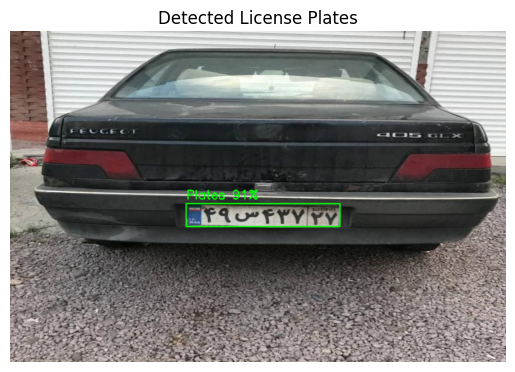

In [6]:
import cv2
import math
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Image path
image_path = r"/kaggle/input/persian-car-plates/Persian_Car_Plates_YOLOV8/test/images/280_png.rf.c6e2081aebcc3cb429fb3749eb014af9.jpg"

# Load model
model = YOLO(r"/kaggle/working/runs/detect/train/weights/best.pt")
classnames = ['Plates']

# Read image
frame = cv2.imread(image_path)
frame = cv2.resize(frame, (1080, 720))

# Detect objects
results = model(frame)

# Process detections
for info in results:
    parameters = info.boxes
    for box in parameters:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        confidence = box.conf[0]
        class_detect = box.cls[0]
        class_detect = int(class_detect)
        class_detect = classnames[class_detect]
        conf = math.ceil(confidence * 100)
        
        if conf > 50 and class_detect == 'Plates':
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f'{class_detect} {conf}%', (x1, y1-10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Convert the image from BGR (OpenCV) to RGB (Matplotlib)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(frame_rgb)
plt.title('Detected License Plates')
plt.axis('off')  # Hide axes
plt.show()
